In [1]:
import numpy as np
import pandas as pd

from torchvision.models.segmentation import deeplabv3_resnet101

from hyper import tune_hyper, tune_result_epoch_stats
from model import UNet
from train import train_model
from dataset import get_dataloaders
from visualization import plot_epoch_stats
from predict import write_predictions

### Training Deeplab

One thing to note about this training run is that this model is trained after tuning and the entire training set has been used. This means that the validation scores are not relevant and reliable. All training set is used to maximize the learning for submission.

In [2]:
dataloaders = get_dataloaders(
    random_transform=True, 
    random_rotate=True,
    random_hflip=True, 
    random_vflip=True,
    train_ratio=0.7,
    seed=20191215,
    patched_target=False
)

model = deeplabv3_resnet101(num_classes=1, pretrained=False)
model, epoch_stats, path, best_f1 = train_model(
    model, dataloaders, num_epochs=500, learning_rate=0.0002, deeplab=True)

Loaded 100 images.
Loaded 30 images.
Epoch 0/499
----------
train Loss: 0.4873 F1: 0.5022 Acc: 0.8043
val Loss: 0.6034 F1: 0.5475 Acc: 0.7805

Epoch 1/499
----------
train Loss: 0.3284 F1: 0.6720 Acc: 0.8815
val Loss: 0.3426 F1: 0.7348 Acc: 0.8853

Epoch 2/499
----------
train Loss: 0.2859 F1: 0.7156 Acc: 0.8908
val Loss: 0.4779 F1: 0.6968 Acc: 0.8356

Epoch 3/499
----------
train Loss: 0.2357 F1: 0.7580 Acc: 0.9094
val Loss: 0.2247 F1: 0.8040 Acc: 0.9179

Epoch 4/499
----------
train Loss: 0.2307 F1: 0.7655 Acc: 0.9106
val Loss: 0.2038 F1: 0.7998 Acc: 0.9218

Epoch 5/499
----------
train Loss: 0.2045 F1: 0.7854 Acc: 0.9202
val Loss: 0.2020 F1: 0.8348 Acc: 0.9265

Epoch 6/499
----------
train Loss: 0.1914 F1: 0.7986 Acc: 0.9278
val Loss: 0.1744 F1: 0.8378 Acc: 0.9349

Epoch 7/499
----------
train Loss: 0.1852 F1: 0.8160 Acc: 0.9296
val Loss: 0.1795 F1: 0.8461 Acc: 0.9344

Epoch 8/499
----------
train Loss: 0.1745 F1: 0.8087 Acc: 0.9315
val Loss: 0.1479 F1: 0.8530 Acc: 0.9415

Epoch 9/4

In [4]:
empty_model = deeplabv3_resnet101(num_classes=1, pretrained=False)
model_path = '/tf/projects/road_segmentation/refik/trained_models/20191209-020809-net.pth' 
write_predictions(empty_model, model_path, deeplab=True, patched=False, image_path='predictions_deeplab_three')

Loaded 50 images.
OK


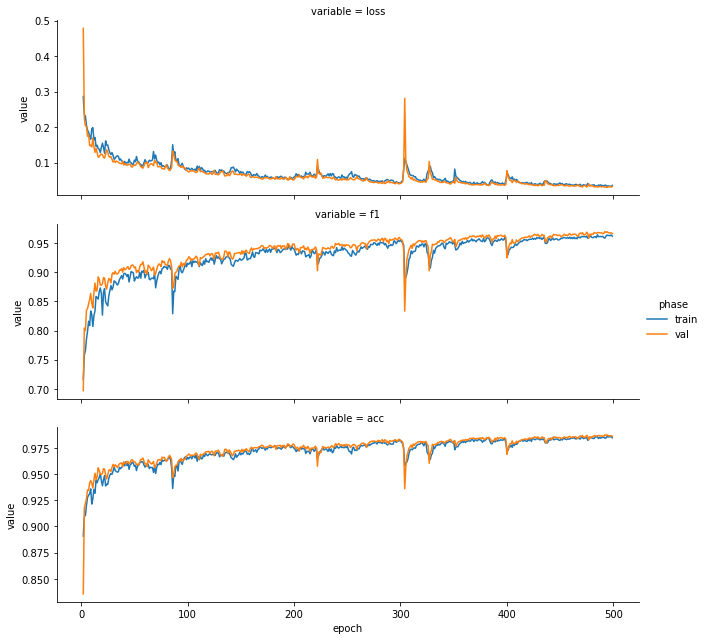

In [3]:
plot_epoch_stats(epoch_stats)